# K-Means Clustering with Python

Implementation of all core concepts in K-Means clustering

Key points to be remembered
- Minimize intracluster distance 
- Maximize intercluster distance

## Dataset Details

Craft Beer Dataset cause Oktoberfest 🍾 Prost everyone!!

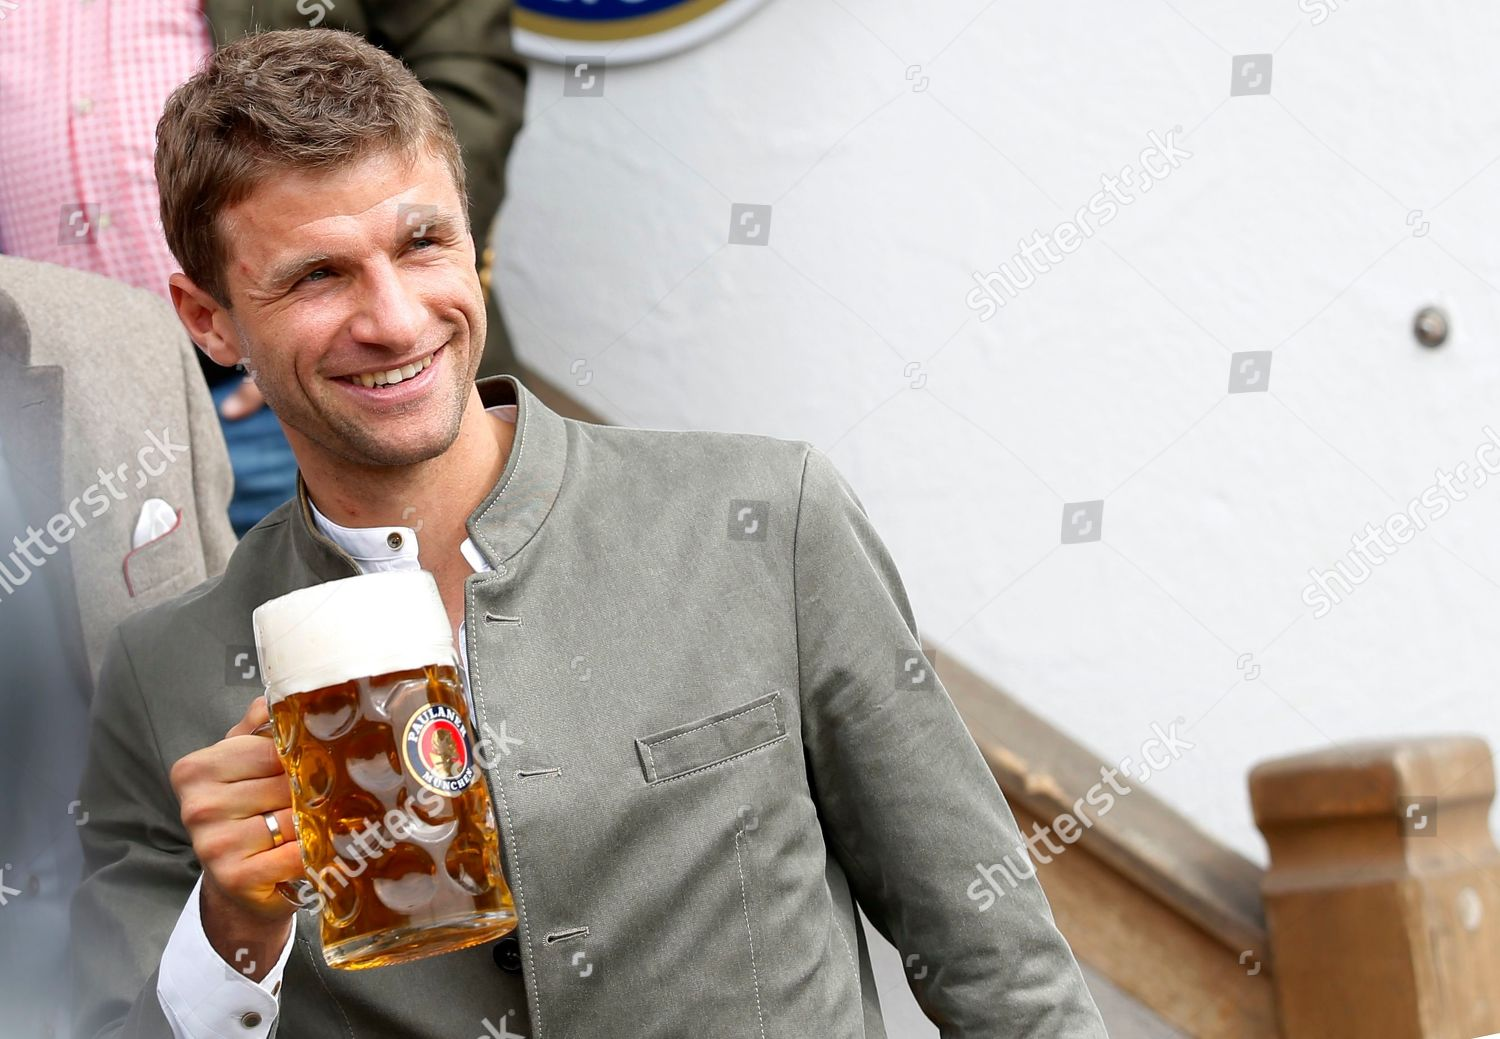



## Dataset descriptions

Craft Beer Dataset downloaded from Kaggle

In [1]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
beer_df = pd.read_csv("https://raw.githubusercontent.com/AtulAravindDas/ToolsforDS/main/beers.csv")
beer_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [6]:
beer_df.drop(columns={"Unnamed: 0"},axis=1,inplace=True)

In [7]:
beer_df.isna().sum()

abv             62
ibu           1005
id               0
name             0
style            5
brewery_id       0
ounces           0
dtype: int64

In [8]:
beer_df.dtypes

abv           float64
ibu           float64
id              int64
name           object
style          object
brewery_id      int64
ounces        float64
dtype: object

In [9]:
beer_df['abv'].isna().sum()

np.int64(62)

In [10]:
for col in beer_df.columns.tolist():
    if beer_df[col].isna().sum()!=0:
        if beer_df[col].dtype!='object':
            beer_df[col].fillna(beer_df[col].mean(),inplace=True)
        else:
            beer_df[col].fillna(beer_df[col].mode()[0],inplace=True)

In [11]:
beer_df.isna().sum()

abv           0
ibu           0
id            0
name          0
style         0
brewery_id    0
ounces        0
dtype: int64

In [10]:
beer_df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,42.713167,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,42.713167,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,42.713167,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,42.713167,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,42.713167,2262,Sex and Candy,American IPA,177,12.0


In [13]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [14]:
pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select numerical columns
beer_features = beer_df[['abv', 'ibu', 'ounces']]
X=beer_features

## Silhouette Scores

The **Silhouette Score** is a metric used to evaluate how well the clusters are formed in a clustering algorithm like **K-Means**.

It measures two aspects for each data point:

- **Cohesion** → how close the point is to other points in the same cluster.  
- **Separation** → how far the point is from points in the nearest *other* cluster.

The score ranges from **-1 to +1**:

- **+1** → Perfectly clustered (points are tight in their own cluster and far from others).  
- **0** → Borderline (point lies on the boundary between clusters).  
- **-1** → Wrong clustering (point assigned to the wrong cluster).

---

## Formula

For a single sample $i$:

$$
s(i) = \frac{b(i) - a(i)}{\max\big(a(i),\, b(i)\big)}
$$

Where:

- $a(i)$ = average distance of point $i$ to all other points in the **same cluster** (intra-cluster distance).  
- $b(i)$ = minimum average distance of point $i$ to all points in the **nearest other cluster** (inter-cluster distance).

The overall **Silhouette Score** is the **average of $s(i)$** across all points.


In [14]:
from sklearn.metrics import silhouette_score
k=3
km = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X)
wcss=km.inertia_
sil = silhouette_score(X, km.labels_)
print("Silhouette (scaled):", sil)
print("\n Within Cluster Sum of Squares:",wcss)

Silhouette (scaled): 0.6770083204591634

 Within Cluster Sum of Squares: 150425.88311191986


# Finding the optimal value of k

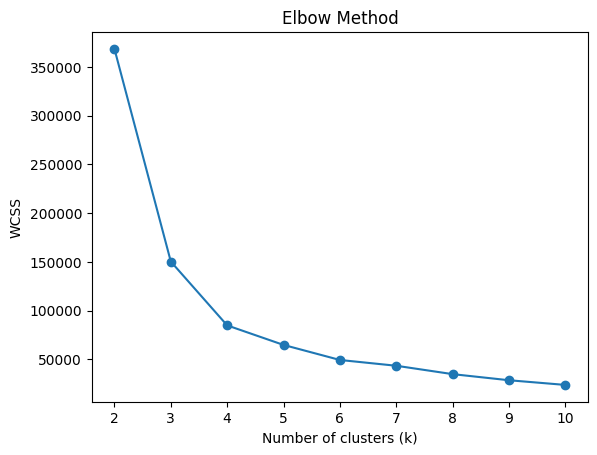

In [15]:
wcss = []
silhouette_scores=[]
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_kmeans=km.fit_predict(X)
    wcss.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X, y_kmeans)
)

# plot wcss
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [16]:
print(silhouette_scores)

[np.float64(0.6721405033976808), np.float64(0.6770083204591634), np.float64(0.695418904976398), np.float64(0.6272609380318073), np.float64(0.627198894307174), np.float64(0.6248222535280751), np.float64(0.5995518579564356), np.float64(0.6208828709352), np.float64(0.6344626805182452)]


In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

init_methods = ['random', 'k-means++']
results = {}

for method in init_methods:
    km = KMeans(n_clusters=4, init=method, random_state=42, n_init=10)
    y_kmeans = km.fit_predict(X)

    wcss = km.inertia_
    silhouette = silhouette_score(X, y_kmeans)

    results[method] = {
        'WCSS': wcss,
        'Silhouette Score': silhouette
    }


for method, scores in results.items():
    print(f"{method} init  WCSS: {scores['WCSS']:.2f}, Silhouette Score: {scores['Silhouette Score']:.4f}")


random init  WCSS: 85389.18, Silhouette Score: 0.6955
k-means++ init  WCSS: 84956.47, Silhouette Score: 0.6954


# Data Scaling using StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

k=3
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
km_scaled = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_scaled)
wcss_scaled=km_scaled.inertia_
sil_scaled = silhouette_score(X_scaled, km_scaled.labels_)
print("Silhouette (scaled):", sil_scaled)
print("\n Within Cluster Sum of Squares:",wcss_scaled)

Silhouette (scaled): 0.41699029267207854

 Within Cluster Sum of Squares: 3383.1168859723225


# Finding the optimal k-value using Elbow-Method for scaled data

THe optimal k can be found and further processes can be done.

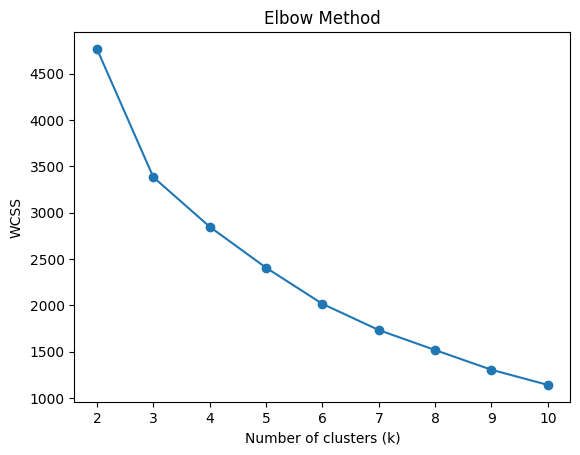

In [18]:
wcss = []
silhouette_scores=[]
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_kmeans=km.fit_predict(X_scaled)
    wcss.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, y_kmeans)
)

# plot wcss
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [19]:
print(silhouette_scores)

[np.float64(0.38722261634970023), np.float64(0.41699029267207854), np.float64(0.43113869079459965), np.float64(0.37428345380293343), np.float64(0.4016994986007872), np.float64(0.40705605944643425), np.float64(0.398912573528486), np.float64(0.42830396456824493), np.float64(0.43795487517540743)]


In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

init_methods = ['random', 'k-means++']
results = {}

for method in init_methods:
    km = KMeans(n_clusters=4, init=method, random_state=42, n_init=10)
    y_kmeans = km.fit_predict(X_scaled)

    wcss = km.inertia_
    silhouette = silhouette_score(X_scaled, y_kmeans)

    results[method] = {
        'WCSS': wcss,
        'Silhouette Score': silhouette
    }


for method, scores in results.items():
    print(f"{method} init  WCSS: {scores['WCSS']:.2f}, Silhouette Score: {scores['Silhouette Score']:.4f}")


random init  WCSS: 2895.88, Silhouette Score: 0.4161
k-means++ init  WCSS: 2848.23, Silhouette Score: 0.4311


# Data Scaling using MinMaxScaler

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

k=3
scaler_2 = MinMaxScaler()
X_scaled_2 = scaler_2.fit_transform(X)
km_scaled_2 = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(X_scaled)
wcss_scaled_2=km_scaled_2.inertia_
sil_scaled_2 = silhouette_score(X_scaled_2, km_scaled_2.labels_)
print("Silhouette (scaled):", sil_scaled_2)
print("\n Within Cluster Sum of Squares:",wcss_scaled_2)

Silhouette (scaled): 0.36696850345980236

 Within Cluster Sum of Squares: 3383.1168859723225


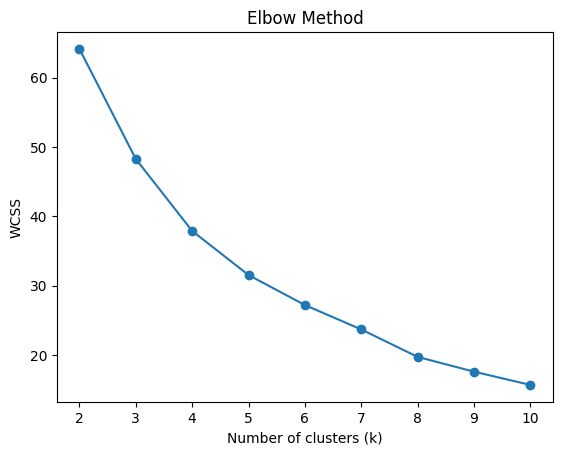

In [22]:
wcss = []
silhouette_scores=[]
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_kmeans_2=km.fit_predict(X_scaled_2)
    wcss.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled_2, y_kmeans_2)
)

# plot wcss
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


In [23]:
print(silhouette_scores)

[np.float64(0.4351569720397293), np.float64(0.38239250149122583), np.float64(0.3919987810894898), np.float64(0.4149610556266661), np.float64(0.4178393133537394), np.float64(0.4466952021709579), np.float64(0.4607876511632279), np.float64(0.4327977231671963), np.float64(0.4701167135262131)]


In [24]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

init_methods = ['random', 'k-means++']
results = {}

for method in init_methods:
    km = KMeans(n_clusters=5, init=method, random_state=42, n_init=10)
    y_kmeans = km.fit_predict(X_scaled_2)

    wcss = km.inertia_
    silhouette = silhouette_score(X_scaled_2, y_kmeans)

    results[method] = {
        'WCSS': wcss,
        'Silhouette Score': silhouette
    }


for method, scores in results.items():
    print(f"{method} init  WCSS: {scores['WCSS']:.2f}, Silhouette Score: {scores['Silhouette Score']:.4f}")


random init  WCSS: 31.54, Silhouette Score: 0.4150
k-means++ init  WCSS: 31.54, Silhouette Score: 0.4150
